In [1]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open(f"../res/tc-preds-refs.pickle", 'rb') as f:
    refs = pickle.load(f)

labels = pd.read_csv('../data/labels_encoded.csv', index_col=0)
classifier = lambda x: int(labels.loc[x]['malware_label'])
test_apns = np.load('../res/test-tc-1000.npy')

In [3]:
true_values = [not labels.loc[a]['malware_label'] for a in test_apns]

In [4]:
prc = dict()
for gamma, probs in refs.items():
    prc[gamma]=precision_recall_curve(true_values, probs)

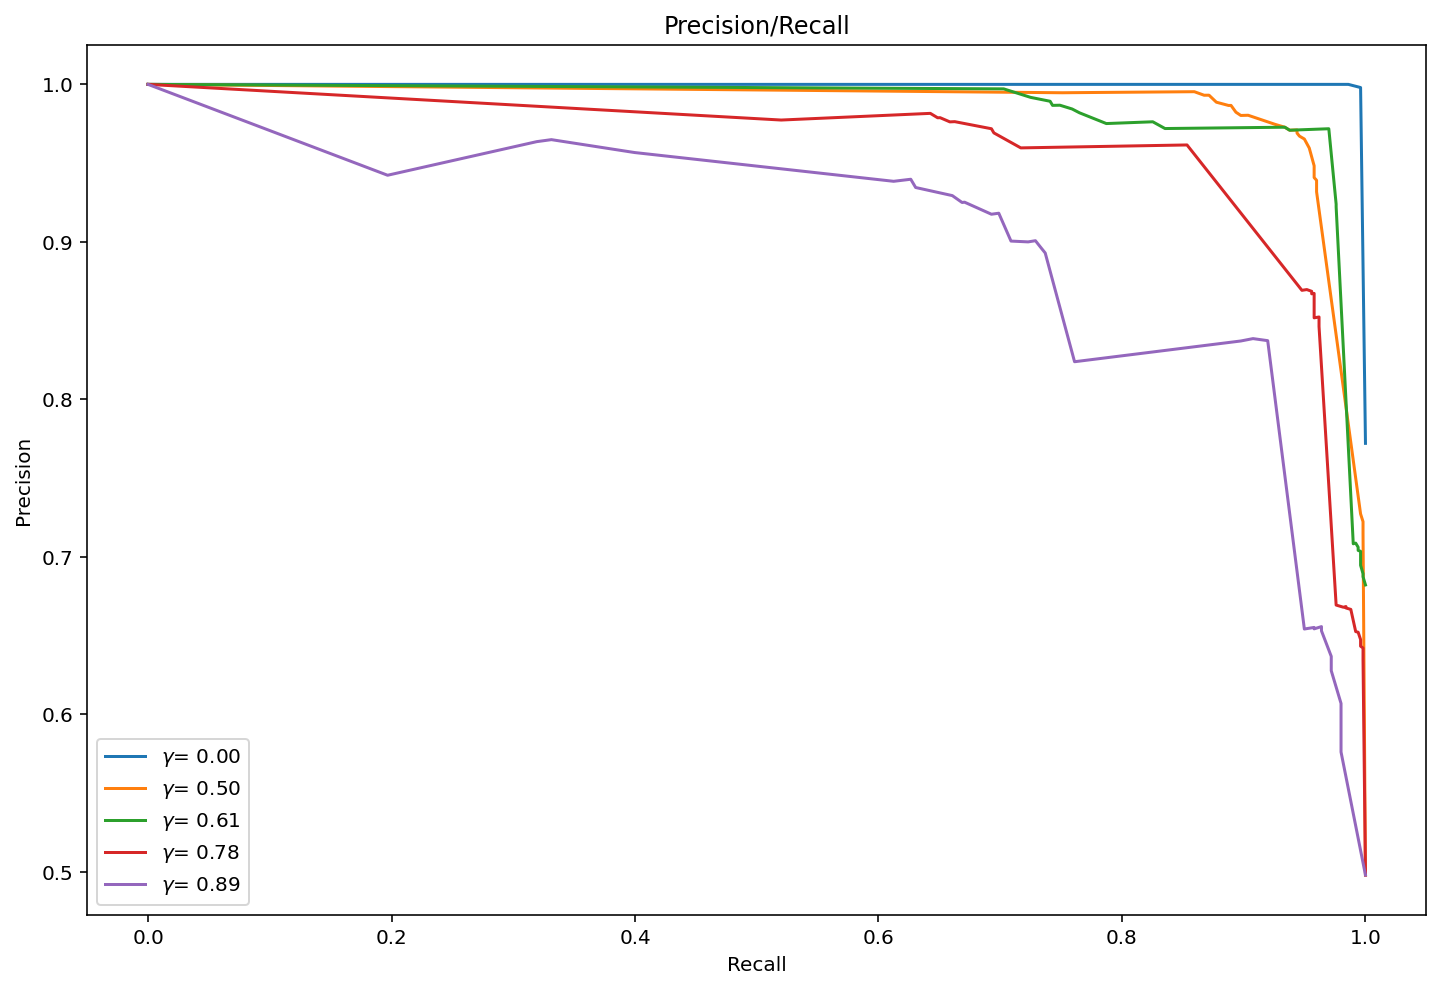

In [5]:
plt.figure(figsize=(12,8))
ax = plt.axes()
#ax.set_prop_cycle(monochrome)
plt.title('Precision/Recall')

gammas = [0.0, 0.5, 0.6111111111111112, 0.7777777777777778, 0.8888888888888888]

for gamma in gammas:
    [precisons, recalls, thresholds] = prc[gamma]
    plt.plot(recalls, precisons, label=f"$\gamma$= {gamma:.2f}")

    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();
#plt.savefig('./fig/precrecall.svg', format='svg', bbox_inches = 'tight', dpi=1000)